# Task 3: Modeling Optimization

**Course:** Introduction to Data Science

**Lecturer:** Prof. Dr. Hendrik Meth

**Group 2:**
- Linus Breitenberger
- Tristan Ruhm
- Prarichut Poachanuan
- Anushka Irphale
- Patryk Gadziosmki

<div style="width:100%;height:30px;background-color:#E31134"></div>

## 0. Importing Requirements

In [2]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import tree

# 1. Reworking of Train- and Testdata
Following the feedback we received from Task 2, we did a little bit of reworking to optimize our linear regression model, before we 
start with Task 3.

Some of our optimization includes:

    -Removed temp and kept atemp during feature selection, as using both would cause multicorrelation problems.
    -removed the labels 'casual' and 'registered', because we only use 'cnt'
    -checked out how 'mnth' is distributed (anectode from the lecture)
    -kept 'instant', because its relevant apparently
    
Since we changed our data set, we also re-tested our models again to compare if the model improved.



## 2. Baseline linear regression model

In [3]:
# Loading the train and test data
train_df = pd.read_csv('new_traindata.csv', delimiter=',')
test_df = pd.read_csv('new_testdata.csv', delimiter=',')

### 2.1. Features/Label - Train/Test Split

In [4]:
# Splitting the train data into features and labels
train_features = train_df.iloc[:, :12]
train_labels = train_df.iloc[:, -1:]

# Splitting the test data into features and labels
test_features = test_df.iloc[:, :12]
test_labels = test_df.iloc[:, -1:]

In [5]:
#comment any of these out to check the content

train_features
# train_labels
# test_features
# test_labels

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,windspeed,leaflets,price reduction
0,154,2.0,0,6,0,0,1,1,0.587133,0.161118,991,0
1,685,4.0,1,11,0,6,1,2,0.324492,0.114392,601,0
2,368,1.0,1,1,0,1,1,1,0.126275,0.198321,549,0
3,472,2.0,1,4,1,0,0,1,0.614925,0.172953,740,0
4,442,1.0,1,3,0,1,0,2,0.505046,0.089160,773,1
...,...,...,...,...,...,...,...,...,...,...,...,...
591,78,1.0,0,3,0,2,0,1,0.466525,0.199010,1022,1
592,81,1.0,0,3,0,5,1,1,0.440642,0.149874,551,0
593,377,1.0,1,1,0,3,1,2,0.381938,0.129101,520,0
594,299,4.0,0,10,0,2,1,2,0.472846,0.111974,605,0


### 2.2. Linear Regression

In [6]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
baseline_model = linear_model.LinearRegression()

baseline_model.fit(train_features, train_labels)

print(baseline_model.coef_)

[[-1.42553372e+01  2.65334950e+02  7.23326846e+03  4.61065266e+02
  -7.19222439e+02 -2.83051737e+01  1.25434799e+02 -8.37393582e+02
   6.11123724e+03 -4.57792039e+03 -1.27136647e-01  1.37186336e+02]]


In [7]:
# Predict all test examples
baseline_pred = baseline_model.predict(test_features)
baseline_pred

array([[3497.67758864],
       [5398.78171469],
       [5396.9271278 ],
       [3617.69439465],
       [4083.86039229],
       [1399.45382863],
       [6963.92003045],
       [6184.89535927],
       [5344.83496204],
       [5956.83901336],
       [5155.16511182],
       [7026.8539815 ],
       [1968.9922792 ],
       [7380.02809318],
       [6172.24638438],
       [7449.99607275],
       [7353.78484478],
       [3284.32112842],
       [5246.32752637],
       [7681.53265437],
       [5291.11174158],
       [3485.81359844],
       [4242.25715741],
       [1508.88826658],
       [5124.43106651],
       [5105.10071673],
       [4013.4452113 ],
       [4572.24340922],
       [6775.34369004],
       [5016.83190039],
       [6873.08033961],
       [7438.97428807],
       [6501.50635325],
       [4959.38117909],
       [1740.9205381 ],
       [4772.61125994],
       [2568.06697754],
       [2258.18448256],
       [2930.36842565],
       [4373.21072674],
       [4895.29444198],
       [1533.029

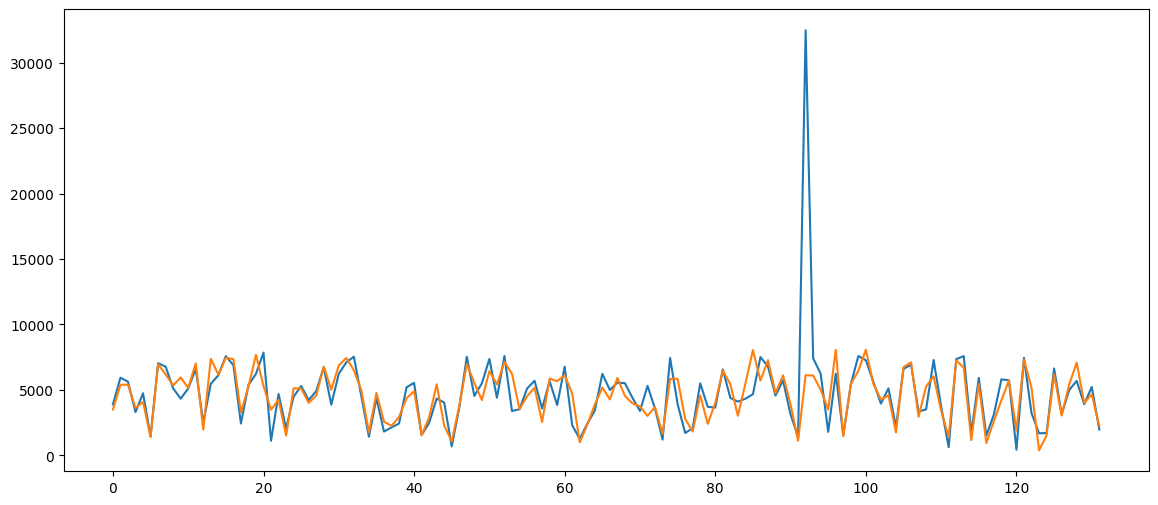

In [8]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(baseline_pred)

In [9]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = baseline_model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - test_labels.iloc[0])

Predict label for following example:
instant            299.000000
season               4.000000
yr                   0.000000
mnth                10.000000
holiday              0.000000
weekday              2.000000
workingday           1.000000
weathersit           2.000000
atemp                0.472846
windspeed            0.120161
leaflets           605.000000
price reduction      0.000000
Name: 0, dtype: float64

Predicted label:  [3497.67758864]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -396.322411
Name: 0, dtype: float64


C:\Users\ruhmt\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
print(round(baseline_pred[:10] - test_labels.iloc[0:10])*100000, 2)

           cnt
0  -39600000.0
1  -53700000.0
2  -23200000.0
3   30800000.0
4  -66400000.0
5   -5100000.0
6   -7600000.0
7  -59300000.0
8   22600000.0
9  162500000.0 2


### 2.3. Evaluate Baseline model

In [11]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, baseline_pred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",baseline_model.score(test_features, test_labels))

MAE: 937.175
R^2 value of the model:  0.3534056679053167


## 3. Model building

### 3.1 Linear Regression

In [12]:
droplist_lr = ['workingday', 'windspeed', 'leaflets', 'price reduction', 'mnth', 'holiday', 'weekday']
train_features_lr = train_features.drop(droplist_lr, axis=1)
test_features_lr = test_features.drop(droplist_lr, axis=1)
train_features_lr.head()

,instant,season,yr,weathersit,atemp
0,154,2.0,0,1,0.587133
1,685,4.0,1,2,0.324492
2,368,1.0,1,1,0.126275
3,472,2.0,1,1,0.614925
4,442,1.0,1,2,0.505046


In [13]:
lr_model = linear_model.LinearRegression()
lr_model.fit(train_features_lr, train_labels)

lr_prediction = lr_model.predict(test_features_lr)

In [14]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, lr_prediction)

print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",lr_model.score(test_features_lr, test_labels))

MAE: 911.851
R^2 value of the model:  0.3804996890160657


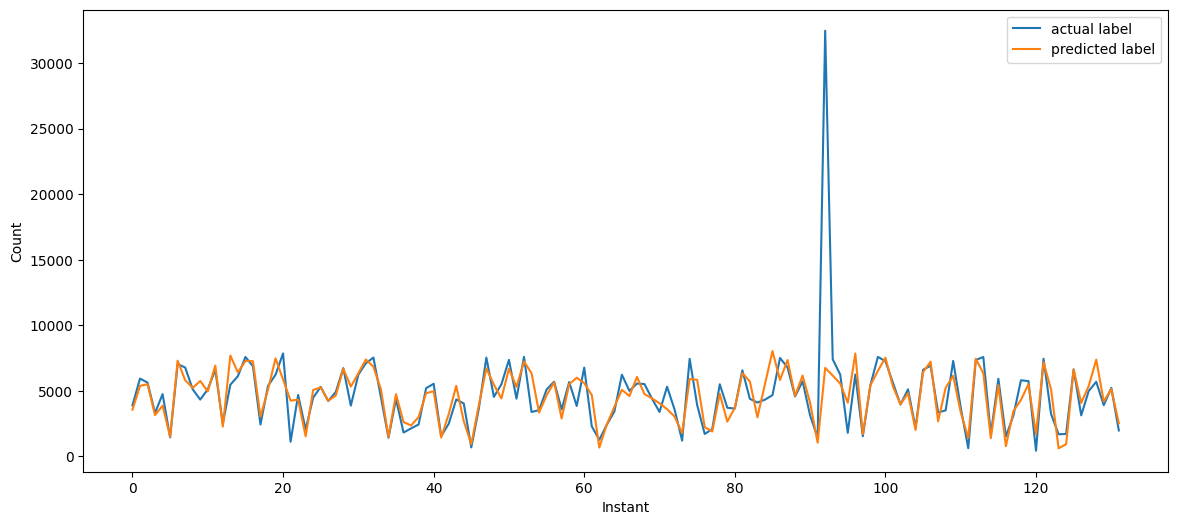

In [15]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(lr_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

In [16]:
print(f"Predict label for following example:\n{test_features_lr.iloc[0,:]}")

#Predict a single value
single_lr_prediction = lr_model.predict([test_features_lr.iloc[0,:]])[0]

print("\nPredicted label: ", single_lr_prediction)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", single_lr_prediction - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
season          4.000000
yr              0.000000
weathersit      2.000000
atemp           0.472846
Name: 0, dtype: float64

Predicted label:  [3560.18708843]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -333.812912
Name: 0, dtype: float64


C:\Users\ruhmt\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 3.2. Polynomial Regression

In [17]:
droplist_poly = ['workingday', 'windspeed', 'leaflets', 'price reduction']
train_features_poly = train_features.drop(droplist_poly, axis=1)
test_features_poly = test_features.drop(droplist_poly, axis=1)
train_features_poly.head()

,instant,season,yr,mnth,holiday,weekday,weathersit,atemp
0,154,2.0,0,6,0,0,1,0.587133
1,685,4.0,1,11,0,6,2,0.324492
2,368,1.0,1,1,0,1,1,0.126275
3,472,2.0,1,4,1,0,1,0.614925
4,442,1.0,1,3,0,1,2,0.505046


In [18]:
poly_model = make_pipeline(PolynomialFeatures(degree=2, # 2 = best value
                                              interaction_only=False, # False = default = best value
                                              include_bias=True, # True/False = no significant change
                                              order='C'), # C/F = no significant change
                           linear_model.LinearRegression()
                           )

poly_model.fit(train_features_poly, train_labels)

poly_prediction = poly_model.predict(test_features_poly)

In [19]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, poly_prediction)

print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",poly_model.score(test_features_poly, test_labels))

MAE: 787.973
R^2 value of the model:  0.4194389747275781


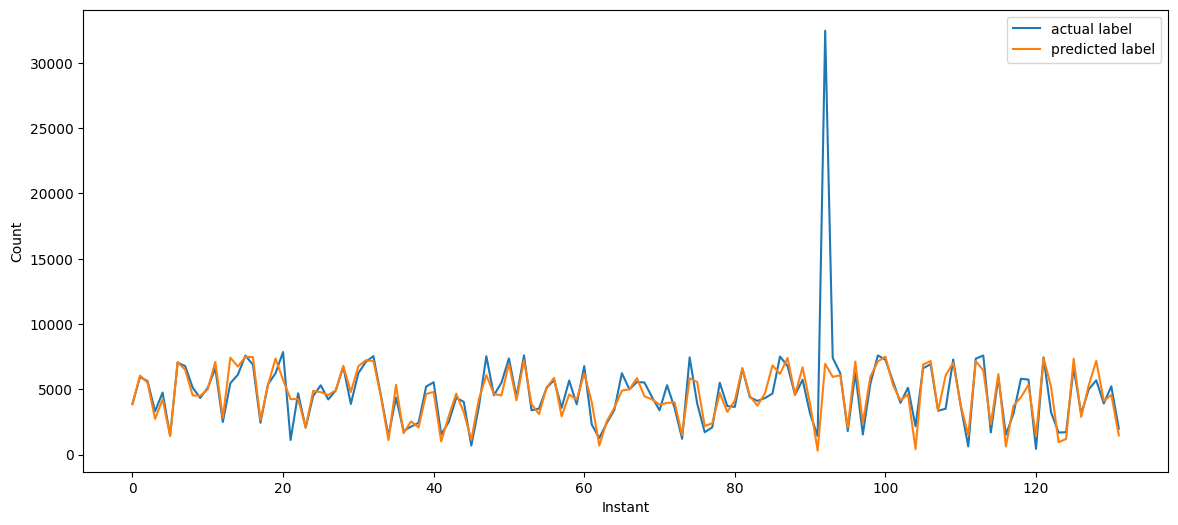

In [20]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(poly_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

In [21]:
print(f"Predict label for following example:\n{test_features_poly.iloc[0,:]}")

#Predict a single value
single_poly_prediction = poly_model.predict([test_features_poly.iloc[0,:]])[0]

print("\nPredicted label: ", single_poly_prediction)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", single_poly_prediction - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
season          4.000000
yr              0.000000
mnth           10.000000
holiday         0.000000
weekday         2.000000
weathersit      2.000000
atemp           0.472846
Name: 0, dtype: float64

Predicted label:  [3841.56494295]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -52.435057
Name: 0, dtype: float64


C:\Users\ruhmt\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### 3.3. K-Nearest-neighbours Regression

In [22]:
droplist_knn = ['leaflets', 'price reduction', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'workingday']
train_features_knn = train_features.drop(droplist_knn, axis=1)
test_features_knn = test_features.drop(droplist_knn, axis=1)
train_features_knn.head()

,instant,season,atemp,windspeed
0,154,2.0,0.587133,0.161118
1,685,4.0,0.324492,0.114392
2,368,1.0,0.126275,0.198321
3,472,2.0,0.614925,0.172953
4,442,1.0,0.505046,0.089160


In [23]:
knn_model = KNeighborsRegressor(n_neighbors=3, # best value
                                weights='uniform', # default
                                algorithm='auto', # default
                                leaf_size=30, # default
                                p=10, # best value
                                metric='minkowski', # default
                                metric_params=None, # default,
                                n_jobs=None # default
                                )

knn_model.fit(train_features_knn, train_labels)

knn_prediction = knn_model.predict(test_features_knn)

In [24]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, knn_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",knn_model.score(test_features_knn, test_labels))

MAE: 787.889
R^2 value of the model:  0.4241129170014134


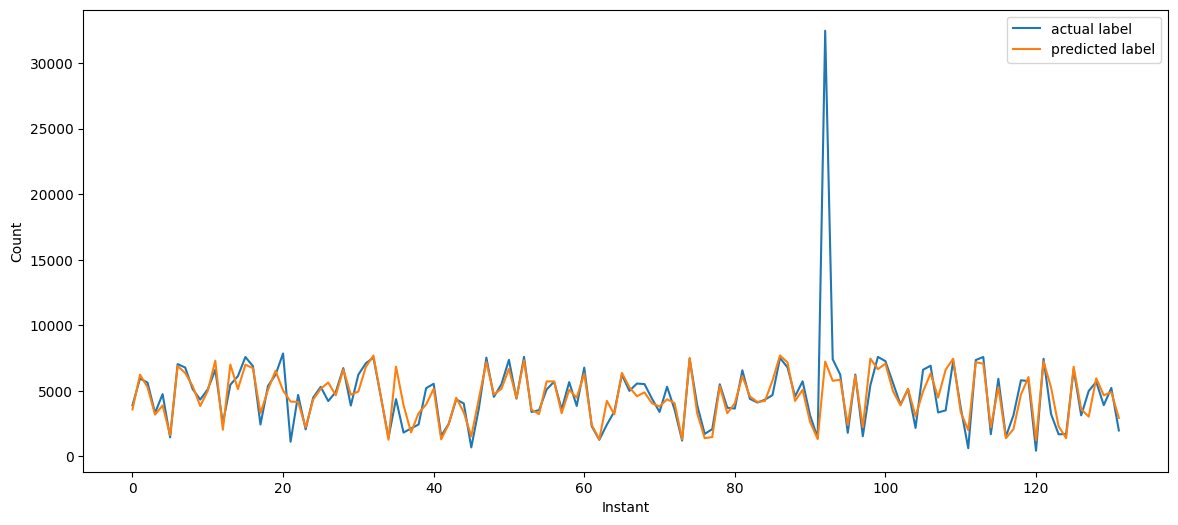

In [25]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(knn_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

In [26]:
print(f"Predict label for following example:\n{test_features_knn.iloc[0,:]}")

#Predict a single value
single_knn_prediction = knn_model.predict([test_features_knn.iloc[0,:]])[0]

print("\nPredicted label: ", single_knn_prediction)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", single_knn_prediction - test_labels.iloc[0])

Predict label for following example:
instant      299.000000
season         4.000000
atemp          0.472846
windspeed      0.120161
Name: 0, dtype: float64

Predicted label:  [3580.]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -314.0
Name: 0, dtype: float64


C:\Users\ruhmt\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


### 3.4. Regression Tree / Decision Tree Regression

In [27]:
droplist_tree = ['leaflets', 'price reduction', 'yr', 'mnth', 'holiday', 'windspeed', 'season']
train_features_tree = train_features.drop(droplist_tree, axis=1)
test_features_tree = test_features.drop(droplist_tree, axis=1)
train_features_tree.head()

,instant,weekday,workingday,weathersit,atemp
0,154,0,1,1,0.587133
1,685,6,1,2,0.324492
2,368,1,1,1,0.126275
3,472,0,0,1,0.614925
4,442,1,0,2,0.505046


In [28]:
tree_model = DecisionTreeRegressor(criterion='absolute_error', # best value
                                   splitter='best', # best value
                                   max_depth=5, # best value
                                   min_samples_split=2, # default
                                   min_samples_leaf=5, # best value
                                   min_weight_fraction_leaf=0.0, # default
                                   max_features=None, # default
                                   random_state=None, # default
                                   max_leaf_nodes=None, # default
                                   min_impurity_decrease= 0.0, # default,
                                   ccp_alpha=0.0 # default
                                   )

tree_model.fit(train_features_tree, train_labels)

tree_prediction = tree_model.predict(test_features_tree)

[Text(0.5223214285714286, 0.9166666666666666, 'x[0] <= 436.0\nabsolute_error = 1546.809\nsamples = 596\nvalue = 4510.0'),
 Text(0.2857142857142857, 0.75, 'x[0] <= 106.5\nabsolute_error = 1084.639\nsamples = 363\nvalue = 3750.0'),
 Text(0.14285714285714285, 0.5833333333333334, 'x[0] <= 44.5\nabsolute_error = 512.8\nsamples = 85\nvalue = 1812.0'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[2] <= 0.5\nabsolute_error = 281.265\nsamples = 34\nvalue = 1383.0'),
 Text(0.03571428571428571, 0.25, 'x[0] <= 29.5\nabsolute_error = 185.5\nsamples = 14\nvalue = 1002.5'),
 Text(0.017857142857142856, 0.08333333333333333, 'absolute_error = 85.444\nsamples = 9\nvalue = 985.0'),
 Text(0.05357142857142857, 0.08333333333333333, 'absolute_error = 222.2\nsamples = 5\nvalue = 1472.0'),
 Text(0.10714285714285714, 0.25, 'x[4] <= 0.208\nabsolute_error = 196.7\nsamples = 20\nvalue = 1534.0'),
 Text(0.08928571428571429, 0.08333333333333333, 'absolute_error = 197.3\nsamples = 10\nvalue = 1453.5'),
 Text(0.12

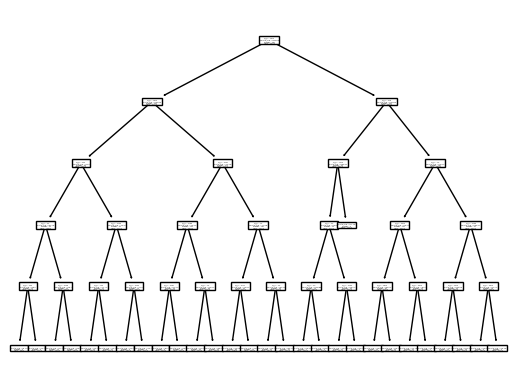

In [29]:
tree.plot_tree(tree_model)

In [30]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, tree_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",tree_model.score(test_features_tree, test_labels))

MAE: 817.727
R^2 value of the model:  0.44207064714392696


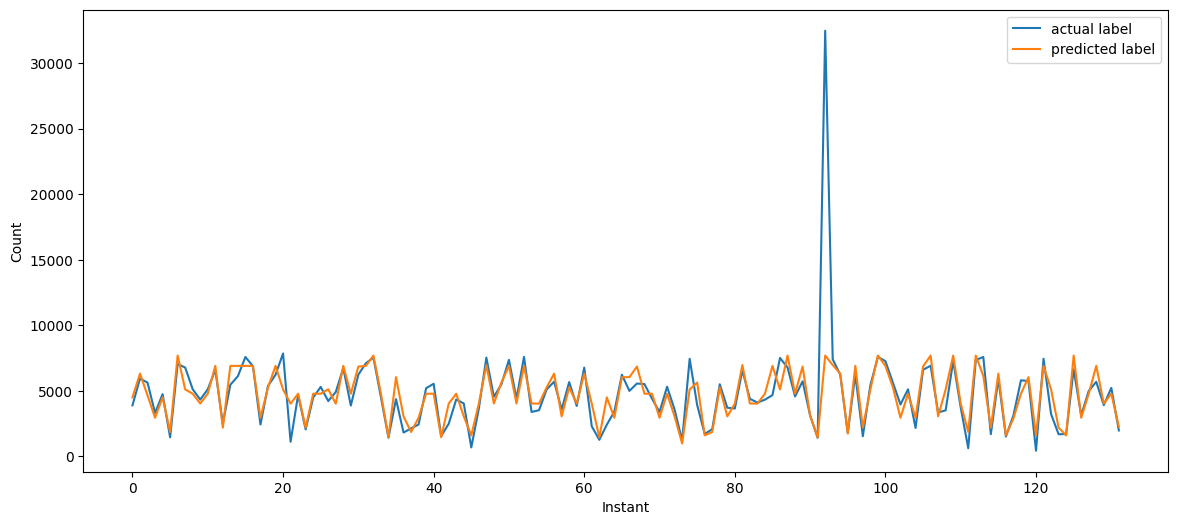

In [31]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(tree_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

In [32]:
print(f"Predict label for following example:\n{test_features_tree.iloc[0,:]}")

#Predict a single value
single_tree_prediction = tree_model.predict([test_features_tree.iloc[0,:]])[0]

print("\nPredicted label: ", single_tree_prediction)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", single_tree_prediction - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
weekday         2.000000
workingday      1.000000
weathersit      2.000000
atemp           0.472846
Name: 0, dtype: float64

Predicted label:  4501.5
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt    607.5
Name: 0, dtype: float64


C:\Users\ruhmt\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### 3.5. Support Vector Regression

In [33]:
droplist_svr = ['leaflets', 'yr', 'windspeed', 'weekday', 'workingday']
train_features_svr = train_features.drop(droplist_svr, axis=1)
test_features_svr = test_features.drop(droplist_svr, axis=1)
train_features_svr.head()

,instant,season,mnth,holiday,weathersit,atemp,price reduction
0,154,2.0,6,0,1,0.587133,0
1,685,4.0,11,0,2,0.324492,0
2,368,1.0,1,0,1,0.126275,0
3,472,2.0,4,1,1,0.614925,0
4,442,1.0,3,0,2,0.505046,1


In [34]:
svr_model = SVR(kernel='linear', # best value
                C=100, # best value
                epsilon=0.2,  # best value
                shrinking=True, # default
                cache_size=200, # default
                max_iter=-1 # default
                )

svr_model.fit(train_features_svr, train_labels)

svr_prediction = svr_model.predict(test_features_svr)

C:\Users\ruhmt\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, svr_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",svr_model.score(test_features_svr, test_labels))

MAE: 913.187
R^2 value of the model:  0.39002111994788713


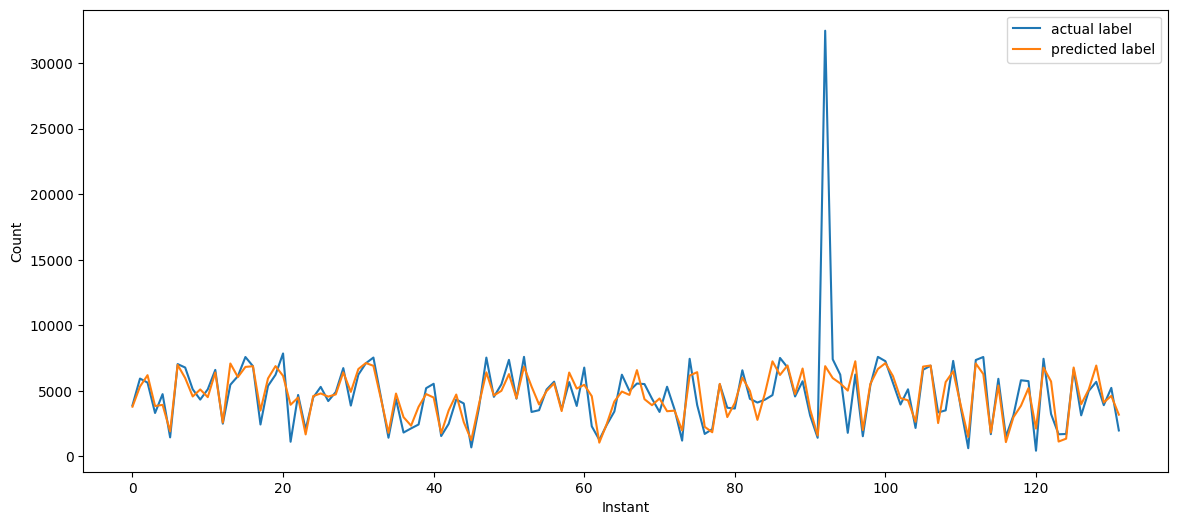

In [36]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(svr_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

In [37]:
print(f"Predict label for following example:\n{test_features_svr.iloc[0,:]}")

#Predict a single value
single_svr_prediction = svr_model.predict([test_features_svr.iloc[0,:]])[0]

print("\nPredicted label: ", single_svr_prediction)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", single_svr_prediction - test_labels.iloc[0])

Predict label for following example:
instant            299.000000
season               4.000000
mnth                10.000000
holiday              0.000000
weathersit           2.000000
atemp                0.472846
price reduction      0.000000
Name: 0, dtype: float64

Predicted label:  3793.141137301686
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -100.858863
Name: 0, dtype: float64


C:\Users\ruhmt\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


### 3.6 GBR

In [ ]:
droplist_svr = ['leaflets', 'yr', 'windspeed', 'weekday', 'workingday', 'season', 'mnth', 'holiday', 'weathersit', 'atemp', 'price reduction']
train_features_svr = train_features.drop(droplist_svr, axis=1)
test_features_svr = test_features.drop(droplist_svr, axis=1)
train_features_svr.head()

In [ ]:
gbr = GradientBoostingRegressor(loss='squared_error',
                                learning_rate=0.4,
                                n_estimators=150,
                                subsample=1,
                                criterion='squared_error',
                                min_samples_split=2, 
                                min_samples_leaf=5,
                                min_weight_fraction_leaf=0.0,
                                max_depth=4,
                                min_impurity_decrease=0.0,
                                init=None,
                                random_state=None,
                                max_features=None,
                                alpha=0.9,
                                verbose=0,
                                max_leaf_nodes=None,
                                warm_start=False,
                                validation_fraction=0.1,
                                n_iter_no_change=None,
                                tol=1e-4,
                                ccp_alpha=0.0)

gbr.fit(train_features, train_labels)

gbr.score(test_features, test_labels)

<div style="width:100%;height:30px;background-color:#E31134"></div>

# 6. Summary of Task 3

## 1. Reworking and Optimization of train and test data

Since our final model for Task 2 didn't seem to be optimal and some details had been overlooked, we decided to do a rework and optimize our train and test data.

Due the high correlation with 'cnt', we decided to keep 'instant' in the dataset. The features 'temp' and 'atemp' had a multicorrelation, so we kept 'atemp', which had a slightly better correlation, in and dropped 'temp'. We also removed the labels 'casual' and 'registered', since we only use 'cnt'.

Finally we tested our models with the new test data and got the following result:
- `MAE`: 923.977 
- `R^2 value of the model`:  0.36870153666640637

The Mean Absolute Error (MAE) improves. On the the other hand, the Coefficient of Determination (R^2) has a determination. We exported the reworked train and test data to csv and used it for the `base linear regression` and the `model optimization`.


## 2. Baseline linear regression

### 2.1 Split

In our first step, we refined the feature and label for our model buidling by splitting the training data into `train_features` and `train_labels` and the test data into `test_features` and `test_label`.

### 2.2 Linear Regression

For our initial model building, we used linear regression to predict the number of bike rentals ('cnt') using labeled training data.

### Model Selection and Training:
We instantiated a linear regression model using the `linear_model.LinearRegression()` function. The model was trained on the training features (`train_features`) and labels (`train_labels`) using the `fit` method.

### Model Coefficients:
- The coefficients of the linear regression model, shich represent the weights assigned to each feature, are printed with `print(baseline_model.coef_)`. These coefficients provide insights into the contribution of each feature to the prediction of the target variable

As in the previous task, this linear regression model serves as our baseline model, providing a starting point for evaluation and possible refinement in subsequent stages of model development.

## 2. Model Optimization

### 2.2 Model Building

For a better model optimization, we have created further model versions besides of the linear regression. Besides linear regression, scikit-learn has various other algorithms. By testing these algorithms, we can find out, which model has the best result. Below we present the results of each algorithm.

For each model, we used the `forward selection`-method, to get the best result.

#### 2.2.1 Polynomial Regression

For the polynomial regression, we used the `makepipeline(PolynomialFeatures())`-function. It returns multiple results, that are run through `linear_model.LinearRegression()` to get one value as a prediction.

We did some fine-tuning with the parameters to get the best possible result. The parameters `degree=2`, `interaction_only='false'`, `include_bias=True`, `include_bias=True` and `order=C`, gave the best result.

<style>

    .heatMap tr:nth-child(11) { background: green; }
</style>

<div class="heatMap">

| Iteration | Selected Features             | Performance (R²) | Decision          |
|------------|--------------------------------|------------------|--------------------|
| 1          | instant                                                         | 0.249            | -                 |
| 2          | instant, atemp                                                  | 0.381            | keep           |
| 3          | instant, atemp, weathersit                                      | 0.409            | keep     |
| 4          | instant, atemp, weathersit, yr                                  | 0.428            | keep  |
| 5          | instant, atemp, weathersit, yr, season                          | 0.436553            | keep  |
| 6          | instant, atemp, weathersit, yr, season, price reduction         | 0.242           | don't keep|
| 7          | instant, atemp, weathersit, yr, season, leaflets                | 0.312            | don't keep   |
| 8          | instant, atemp, weathersit, yr, season, windspeed               | 0.411            | don't keep         |
| 9          | instant, atemp, weathersit, yr, season, workingday              | 0.377            | don't keep         |
| 10          | instant, atemp, weathersit, yr, season, weekday                 | 0.436904            | keep         |
| 11          | instant, atemp, weathersit, yr, season, weekday, holiday        | 0.437776            | keep         |
| 12         | instant, atemp, weathersit, yr, season, weekday, holiday, mnth  | 0.4194            | don't keep         |

</div>

#### 2.2.2 K-Nearest-neighbors Regression

With the K-nearest-neighbors regression, we compared each value of 'cnt' with its 3 nearest neighbors. We used the function `KNeighborsRegressor()`-function to predict a numeric label that is the average of all 3 values. A special aspect is that no linear relations are needed to build a model.

We used the parameters `weights=uniform`, `algorithm=auto`, `leaf_size= default`, `p = 10`, `metric = default` and `n_jobs = None`. For the number of the nearest neighbors we used the parameter `n_neighbor=3`, since a comparison with 3 values had the best result in R².

<style>

    .heatMap tr:nth-child(11) { background: green; }
</style>

<div class="heatMap">

| Iteration | Selected Features             | Performance (R²) | Decision          |
|------------|--------------------------------|------------------|--------------------|
| 1          | instant                                                         | 0.414            | -              |
| 2          | instant, atemp                                                  | 0.416            | keep           |
| 3          | instant, atemp, weathersit                                      | 0.416            | don't keep     |
| 4          | instant, atemp, weekday                                         | 0.412            | don't keep  |
| 5          | instant, atemp, holiday                                         | 0.416            | don't keep  |
| 6          | instant, atemp, mnth                                            | 0.416            | don't keep  |
| 7          | instant, atemp, yr                                              | 0.416            | don't keep   |
| 8          | instant, atemp, season                                          | 0.423            | keep         |
| 9          | instant, atemp, season, price reduction                         | 0.423            | don't keep         |
| 10          | instant, atemp, season, leaflets                               | 0.400            | don't keep         |
| 11          | instant, atemp, season, windspeed                               | 0.424            | keep         |
| 12          | instant, atemp, season, windspeed, workingday                   | 0.418           | don't keep         |
</div>

#### 2.2.3 Regression Tree / Decision Tree Regression

A regression tree allows you to handle nominal features and nonlinear relationships. We used the `DecisionTreeRegressor()` function.

For fine tuning, we used the parameters `criterion = absolute_error`, `splitter = best`, `max_depth = 5`, `min_sample_split = default`, `min_sample_leaf = 5`, `min_weight_fraction_leaf = 0.0` and `max_features = None`. For max_features, we chose None because we want all features to be taken in one split.  

<style>

    .heatMap tr:nth-child(11) { background: green; }
</style>

<div class="heatMap">

| Iteration | Selected Features             | Performance (R²) | Decision          |
|------------|--------------------------------|------------------|--------------------|
| 1          | instant                                                         | 0.418            | -                 |
| 2          | instant, season                                                 | 0.418            | don't keep           |
| 3          | instant, atemp                                      | 0.431            | keep     |
| 4          | instant, atemp, windspeed                                  | 0.430            | don't keep  |
| 5          | instant, atemp, workingday                          | 0.432            | keep  |
| 6          | instant, atemp, workingday, weathersit         | 0.441           |  keep  |
| 7          | instant, atemp, workingday, weathersit, workingday         | 0.442         | keep   |
| 8          | instant, atemp, workingday, weathersit; workingday, holiday             | 0.442      | don't keep         |
| 9          | instant, atemp, workingday, weathersit; workingday, mnth         | 0.442            | don't keep         |
| 10          | instant, atemp, workingday, weathersit; workingday,yr            | 0.442            | don't keep         |
| 11          | instant, atemp, workingday, weathersit, workingday, price reduction    | 0.442      | don't keep         |
| 12          | instant, atemp, workingday, weathersit, workingday, leaflets  | 0.438           | don't keep         |
</div>

#### 2.2.4 Support Vector Regression

The Support Vector Regression defines a hyperplane that can be linear, polynomial or Gaussian.

We took the features `leaflets`, `yr`, `windspeed`, `workingday` and dropped them from the `train_features` and `test_features`. 

First, we used the function `SVR()` function with a polynomial kernel because the polynomial regression evaluation gave a good result. The result of it was not so good as expected, so we decided to use the linear kernel, which gave a better result.

For the parameters we used the settings `C=100`, `epsilon=0.2`, `shrinking=True`, `cache_size=200`, `max_iter=-1`

The model was then fitted with `train_features_svr` and `train_labels`.

<style>

    .heatMap tr:nth-child(11) { background: green; }
</style>

<div class="heatMap">

| Iteration | Selected Features             | Performance (R²) | Decision          |
|------------|--------------------------------|------------------|--------------------|
| 1          | instant                                                         | 0.272            | -                 |
| 2          | instant, weathersit                                            | 0.301            | keep           |
| 3          | instant, weathersit, workingday                                      | 0.296            | don't keep     |
| 4          | instant, weathersit, weekday                                 | 0.282            | don't keep  |
| 5          | instant, weathersit, atemp                          | 0.366            | keep  |
| 6          | instant, weathersit, atemp, season         | 0.370           |  keep  |
| 7          | instant, weathersit, atemp, season, windspeed         | 0.370         | dont't keep   |
| 8          | instant, weathersit, atemp, season, holiday             | 0.371      | keep         |
| 9          | instant, weathersit, atemp, season, holiday, mnth         | 0.389            | keep         |
| 10          | instant, weathersit, atemp, season, holiday, mnth, yr            | 0.389            | don't keep         |
| 11          | instant, weathersit, atemp, season, holiday, mnth, price reduction    | 0.390      | keep         |
| 12          | instant, weathersit, atemp, season, holiday, mnth, price reduction ,leaflets | 0.388  | don't keep       |
</div>

### 2.3 Evaluation

For a better comparison, we included a linear regression model with selected features.

<style>

    .heatMap tr:nth-child(3) { background: green; }
    .heatMap tr:nth-child(4) { background: green; }
</style>

<div class="heatMap">

| Model | Features             | MAE | R²          |
|------------|--------------------------------|------------------|--------------------|
| Linear Regression    | instant, season, yr, weathersit, atemp     | 911.851   | 0.3804996890160657                 |
| Polynomial Regression  | instant, season, yr, mnth, holiday, weekday, weathersit, atemp           | 787.973            | 0.4194389747273023           |
| K-Nearest-Neighbors Regression    | instant, season, atemp, windspeed       | 787.889            | 0.4241129170014134     |
| Regression Tree          | instant, weekday, workingday, weathersit, atemp | 817.727            | 0.44207064714392696  |
| Support Vector Regression          | instant, season, mnth, holiday, weathersit, atemp, price reduction          | 913.187            | 0.3900211198538589  |
</div>

### 2.4 Interpretation & Conclusion

The linear regression has a bad R², because the `count` label is not linear over the time.

The polynomial regression gives a better result. Thats because the data structure of label `count` has a slightly polynomial structure. But because it has multiple curves the prediction is not precisely.

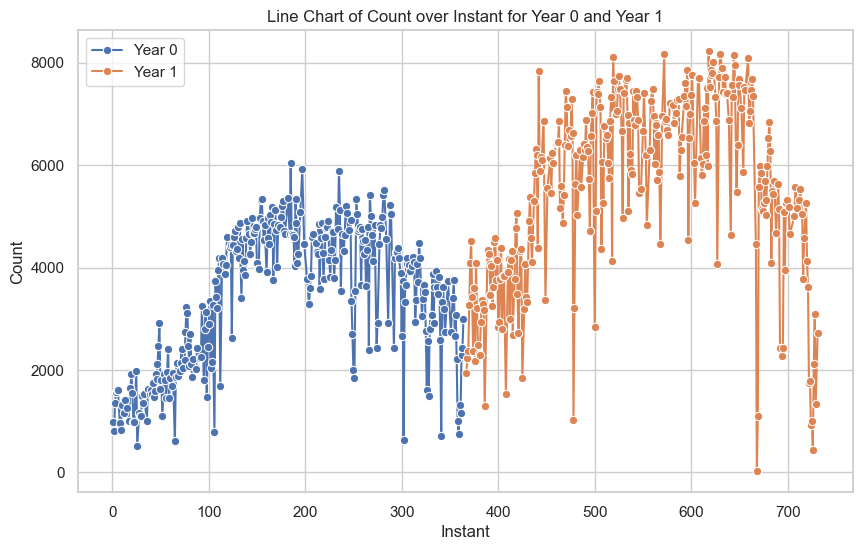

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aufteilung des DataFrame basierend auf dem Wert in der "year"-Spalte
df_year_grouped = train_df.groupby('yr')

# Aufteilen in separate DataFrames
df_year_0 = df_year_grouped.get_group(0)
df_year_1 = df_year_grouped.get_group(1)

# Annahme: df_year_0 und df_year_1 sind deine aufgeteilten DataFrames
df_year_0 = df_year_grouped.get_group(0)
df_year_1 = df_year_grouped.get_group(1)

# Setze den Seaborn-Stil
sns.set(style="whitegrid")

# Erstelle das Line Chart für df_year_0
plt.figure(figsize=(10, 6))
sns.lineplot(x='instant', y='cnt', data=df_year_0, marker='o', label='Year 0')

# Füge das Line Chart für df_year_1 hinzu
sns.lineplot(x='instant', y='cnt', data=df_year_1, marker='o', label='Year 1')

# Beschriftungen und Titel hinzufügen
plt.xlabel('Instant')
plt.ylabel('Count')
plt.title('Line Chart of Count over Instant for Year 0 and Year 1')

# Legende hinzufügen
plt.legend()

# Plot anzeigen
plt.show()

K-NN has a good result, because we have set the parameter `n_neighbor` to 3. This means, that a prediction with the 3 nearest neighbor values is the most accurate, because in our data set the distance between the value and the 3 neighbors are close to each other. Its more likely, that there are no extreme distances or radical development. 

The regression tree is an optimal model for working out non-linear relationships. Since we found out that `count` is non-linear, this result makes more sense.  

We tried out a linear and poly kernel 


- Support Vector Regression had a  linear kernel, so it had a similar result like the linear regression, we tried out with poly kernel, but it had worse result